<a href="https://colab.research.google.com/github/konrad-l/waviness_prediction/blob/main/CNC_XGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.graph_objects as go
import plotly.express as px

In [2]:
df_raw = pd.read_excel('Wt_CNC.xlsx')
df = df_raw.copy()

In [3]:
df.head()

,α [°],θ [°],Prędkość osiowa Vu [mm/s],Gniot δ [-],Fx [kN],Fr [kN],M [Nm],Wz [μm]
0,15,2.5,10,1.13,3.806820,34.813303,360.838194,123.5
1,15,2.5,10,1.30,4.496979,46.912708,487.337401,48.3
2,15,2.5,10,1.53,9.202321,49.436845,519.859476,45.1
3,15,2.5,20,1.13,2.952857,28.156369,396.283765,118.7
4,15,2.5,20,1.30,9.926132,42.385259,600.226120,52.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   α [°]                      81 non-null     int64  
 1   θ [°]                      81 non-null     float64
 2   Prędkość osiowa Vu [mm/s]  81 non-null     int64  
 3   Gniot δ [-]                81 non-null     float64
 4   Fx [kN]                    70 non-null     float64
 5   Fr [kN]                    70 non-null     float64
 6   M [Nm]                     70 non-null     float64
 7   Wz [μm]                    70 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 5.2 KB


In [5]:
df.columns = ['alfa', 'tetha', 'Vu', 'gniot', 'Fx', 'Fr', 'M', 'Wz']
df.head()

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz
0,15,2.5,10,1.13,3.806820,34.813303,360.838194,123.5
1,15,2.5,10,1.30,4.496979,46.912708,487.337401,48.3
2,15,2.5,10,1.53,9.202321,49.436845,519.859476,45.1
3,15,2.5,20,1.13,2.952857,28.156369,396.283765,118.7
4,15,2.5,20,1.30,9.926132,42.385259,600.226120,52.6


In [6]:
df[df['Wz'].isnull() == True]

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz
6,15,2.5,40,1.13,NaN,NaN,NaN,NaN
7,15,2.5,40,1.30,NaN,NaN,NaN,NaN
8,15,2.5,40,1.53,NaN,NaN,NaN,NaN
17,20,2.5,40,1.53,NaN,NaN,NaN,NaN
24,25,2.5,40,1.13,NaN,NaN,NaN,NaN
25,25,2.5,40,1.30,NaN,NaN,NaN,NaN
26,25,2.5,40,1.53,NaN,NaN,NaN,NaN
54,15,7.5,10,1.13,NaN,NaN,NaN,NaN
56,15,7.5,10,1.53,NaN,NaN,NaN,NaN
63,20,7.5,10,1.13,NaN,NaN,NaN,NaN


In [7]:
df = df.dropna().reset_index(drop=True)
df = df.round(2)
df

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz
0,15,2.5,10,1.13,3.81,34.81,360.84,123.5
1,15,2.5,10,1.30,4.50,46.91,487.34,48.3
2,15,2.5,10,1.53,9.20,49.44,519.86,45.1
3,15,2.5,20,1.13,2.95,28.16,396.28,118.7
4,15,2.5,20,1.30,9.93,42.39,600.23,52.6
...,...,...,...,...,...,...,...,...
65,25,7.5,20,1.30,0.84,32.88,701.94,125.1
66,25,7.5,20,1.53,12.34,38.16,786.54,199.6
67,25,7.5,40,1.13,3.84,26.14,589.82,280.1
68,25,7.5,40,1.30,9.26,38.16,932.41,113.3


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   alfa    70 non-null     int64  
 1   tetha   70 non-null     float64
 2   Vu      70 non-null     int64  
 3   gniot   70 non-null     float64
 4   Fx      70 non-null     float64
 5   Fr      70 non-null     float64
 6   M       70 non-null     float64
 7   Wz      70 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 4.5 KB


In [9]:
df.corr()

,alfa,tetha,Vu,gniot,Fx,Fr,M,Wz
alfa,1.000000,0.043133,-0.036881,0.002977,0.334302,-0.382654,-0.061227,0.206879
tetha,0.043133,1.000000,0.265283,0.020517,-0.450355,-0.073572,0.494799,0.588393
Vu,-0.036881,0.265283,1.000000,-0.023870,0.268592,0.031388,0.548960,0.143914
gniot,0.002977,0.020517,-0.023870,1.000000,0.549815,0.793421,0.590897,-0.459641
Fx,0.334302,-0.450355,0.268592,0.549815,1.000000,0.343027,0.305656,-0.475014
Fr,-0.382654,-0.073572,0.031388,0.793421,0.343027,1.000000,0.616874,-0.584735
M,-0.061227,0.494799,0.548960,0.590897,0.305656,0.616874,1.000000,-0.100229
Wz,0.206879,0.588393,0.143914,-0.459641,-0.475014,-0.584735,-0.100229,1.000000


Text(0.5, 1.0, 'Heatmap')

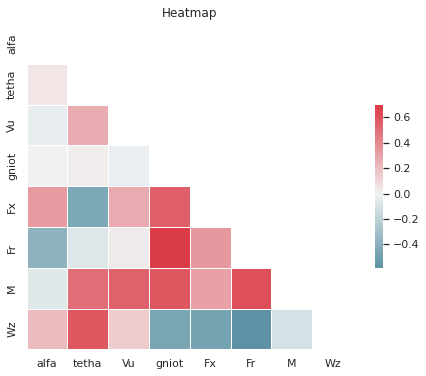

In [10]:
corr = df.corr()

sns.set(style='white')
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.7, center=0,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
ax.set_title('Heatmap')

**XGBoost**

In [11]:
data_raw = df.values
target = data_raw[:,7]
print('target shape:', target.shape)

data = data_raw[:,:4]
print('data shape:', data.shape)

target shape: (70,)
data shape: (70, 4)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(data)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

print(f'X_train shape {X_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')

X_train shape (49, 4)
X_test shape (21, 4)
y_train shape (49,)
y_test shape (21,)


In [14]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

xgb_regressor = XGBRegressor(objective="reg:squarederror")
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

r2_score(y_test, y_pred)

0.6273283881547804

**Grid Search**

In [15]:
from sklearn.model_selection import GridSearchCV

regressorGS = XGBRegressor(objective="reg:squarederror")

params = {'learning_rate': np.arange(0.01, 0.9, 0.01),
          'n_estimators': np.arange(100, 500, 1)}

grid_search = GridSearchCV(regressorGS, param_grid=params, scoring='r2', cv=7)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=7,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
       412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424,
       425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437,
       438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450,
       451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463,
       464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476,
       477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489,
       490, 491, 492, 493, 494, 495, 496, 497, 498, 499])},
             scoring='r2')

In [16]:
grid_search.best_params_

{'learning_rate': 0.47000000000000003, 'n_estimators': 499}

In [ ]:
'n_estimators': np.arange(100, 300, 1)

In [19]:
xgb_regressor = XGBRegressor(objective="reg:squarederror", learning_rate=0.03, n_estimators=199)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

r2_score(y_test, y_pred)

0.6783870140760009

In [18]:
"""
xgb_regressor = XGBRegressor(objective="reg:squarederror", learning_rate=0.47, n_estimators=499)
xgb_regressor.fit(X_train, y_train)
y_pred = xgb_regressor.predict(X_test)

r2_score(y_test, y_pred)
"""

0.6241555723346572

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=xgb_regressor, X=X_train, y=y_train, cv=7)
scores

array([-0.11191543,  0.54965906,  0.80213159,  0.83474569,  0.69370712,
        0.80799645,  0.71859727])

In [21]:
predictions = pd.DataFrame(data={'y_test': y_test, 'y_pred': y_pred})
predictions.head()

,y_test,y_pred
0,75.5,58.352562
1,123.5,120.696442
2,177.1,133.553238
3,52.6,69.359306
4,148.6,183.194458


In [22]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=predictions.index, y=predictions['y_test'], mode='lines', name='y_test'))
fig.add_trace(go.Scatter(x=predictions.index, y=predictions['y_pred'], mode='lines', name='y_pred'))
fig.update_layout(height=500, width=900, title_text="Falistość - Random Forest",
                  xaxis_title='Number of probes', yaxis_title='Wt')

**Wartość Shapley’a**

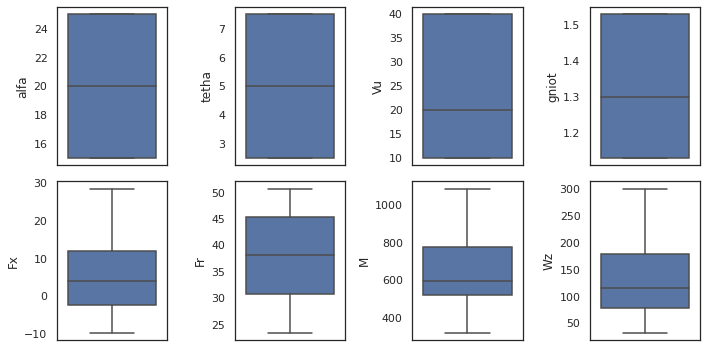

In [23]:
# wykresy pudełkowe

fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index = index + 1
plt.tight_layout()

In [25]:
# Wykresy gęstości (rozkłady)
"""
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index = index + 1
plt.tight_layout()
"""

'\nfig, axs = plt.subplots(ncols=4, nrows=2, figsize=(10, 5))\nindex = 0\naxs = axs.flatten()\nfor k,v in df.items():\n    sns.distplot(v, ax=axs[index])\n    index = index + 1\nplt.tight_layout()\n'

In [26]:
df_2 = df.iloc[:,:4]

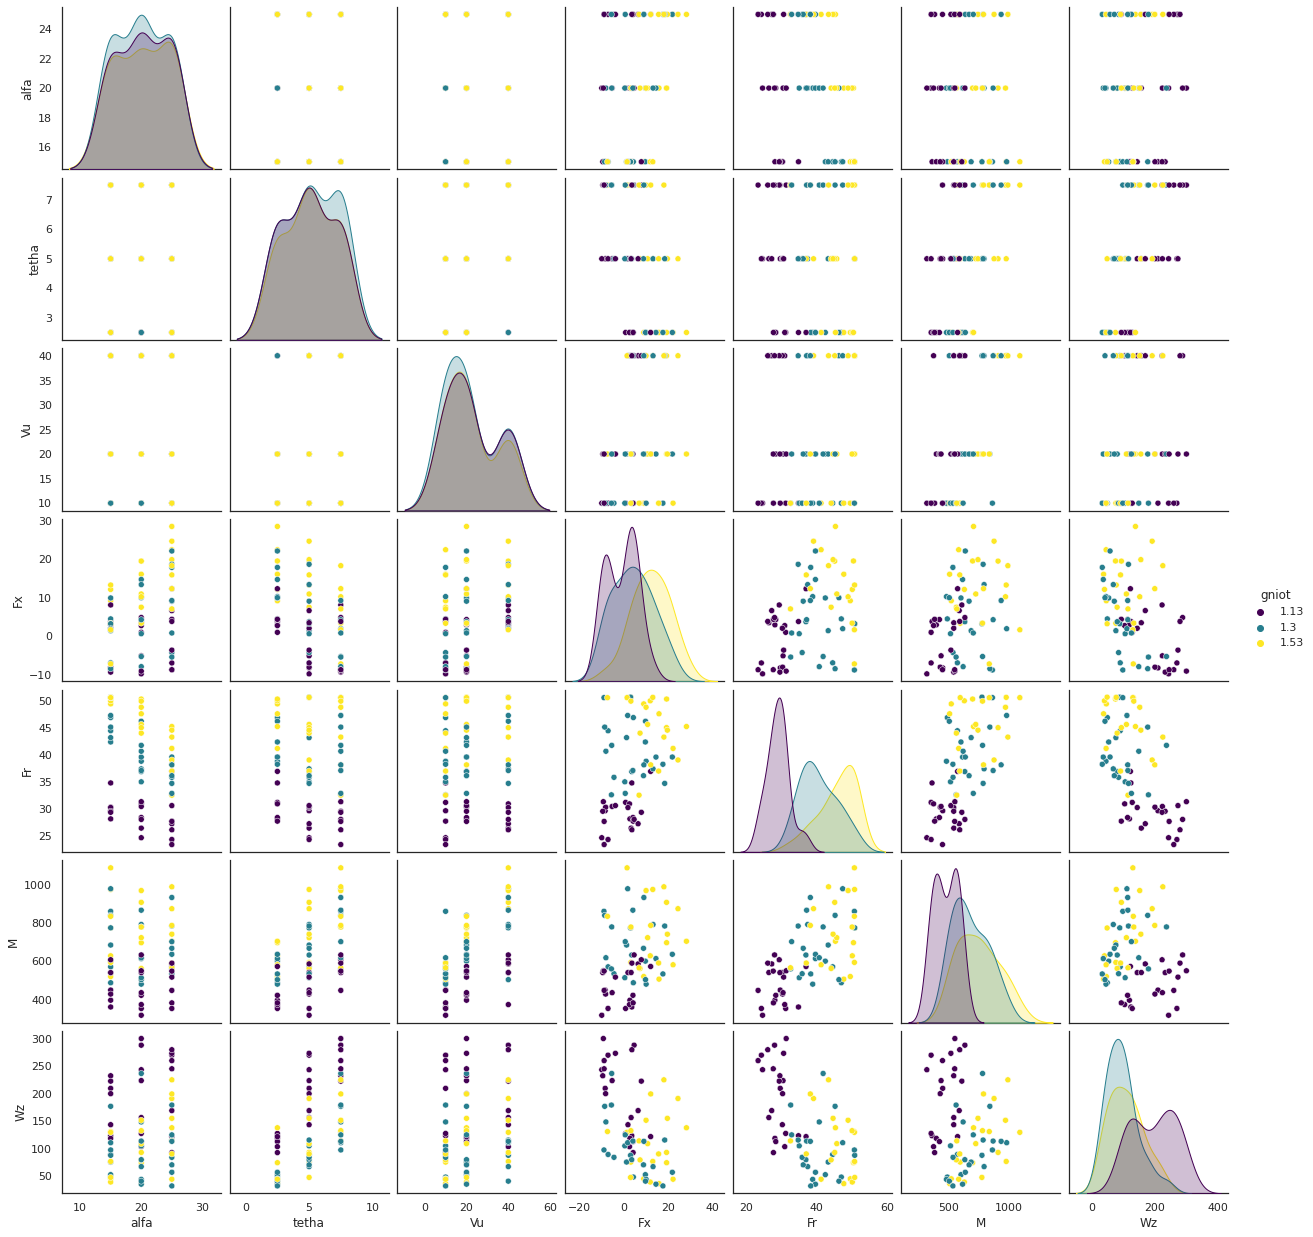

In [27]:
_= sns.pairplot(df, hue='gniot', palette='viridis')

**Biblioteka SHAP**

In [28]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.1 MB/s eta 0:00:00


In [29]:
import shap

In [30]:
explainer = shap.TreeExplainer(xgb_regressor)

In [31]:
shap_values = explainer.shap_values(X_test)
print(f'Shape: {shap_values.shape}')
pd.DataFrame(shap_values).head(3)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Shape: (21, 4)


,0,1,2,3
0,-19.516258,-7.516266,-6.776611,-45.066948
1,-5.322699,-68.703636,1.030016,56.464123
2,-17.147318,41.958149,11.352545,-39.838764


In [32]:
column_names = ['alfa', 'tetha', 'Vu', 'gniot']

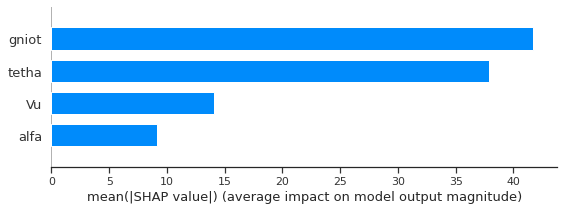

In [33]:
shap.summary_plot(shap_values, X_test, plot_type='bar', feature_names=column_names)

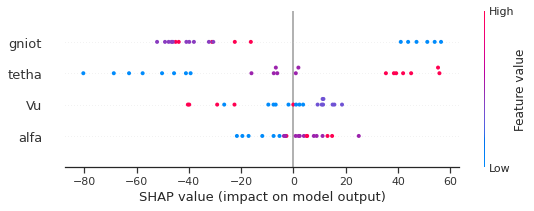

In [34]:
shap.summary_plot(shap_values, X_test, feature_names=column_names)

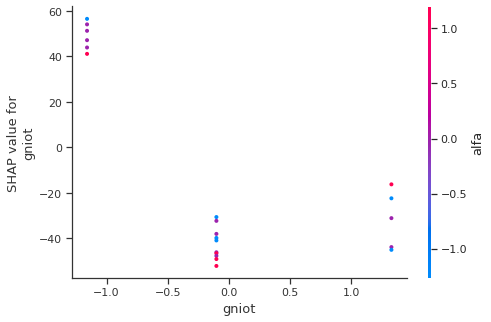

In [35]:
# Wykres zależności

shap.dependence_plot(3, shap_values, X_test, feature_names=column_names)

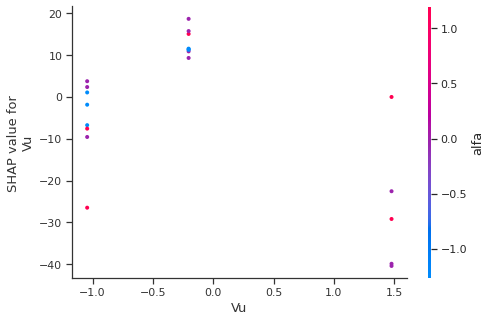

In [36]:
shap.dependence_plot(2, shap_values, X_test, feature_names=column_names)

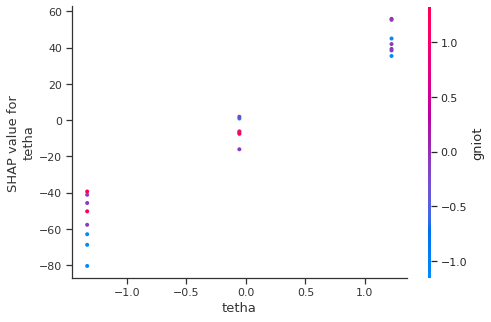

In [37]:
shap.dependence_plot(1, shap_values, X_test, feature_names=column_names)

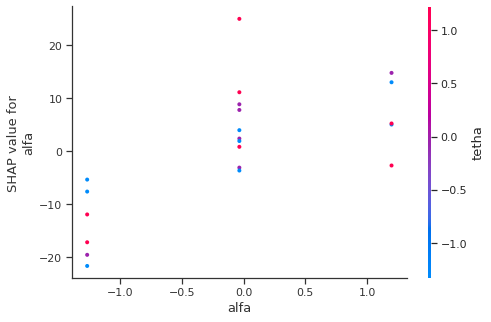

In [38]:
shap.dependence_plot(0, shap_values, X_test, feature_names=column_names)

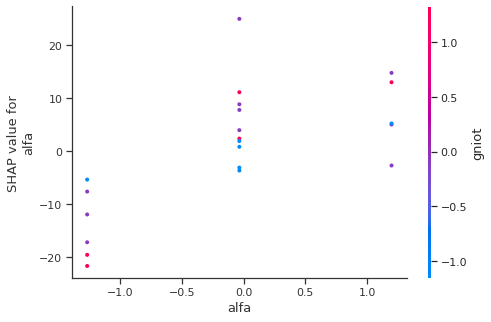

In [39]:
shap.dependence_plot(0, shap_values, X_test, feature_names=column_names, interaction_index="gniot")